# 고급회귀분석 실습 CH13

SEOYEON CHOI  
2022-11-28

chapter 13

# 가변수

In [1]:
library(ggplot2)

## Example

In [2]:
dt <- data.frame(
  y = c(17,26,21,30,22,1,12,19,4,16,
        28,15,11,38,31,21,20,13,30,14),
  x1 = c(151,92,175,31,104,277,210,120,290,238,
         164,272,295,68,85,224,166,305,124,246),
  x2 = factor(rep(c(0,1), each=10))
)

할 수 있는 경우의 수 1.

``` r
x2 = factor(rep(c('M','F'), each=10))
```

-   character로 넣어도 factor로 인식한다.
-   조심할 점 **알파벳 순으로 숫자가 부여된다.**
-   따라서 F는 0, M은 1로 부여되었다.
    -   참고: 강의록은 F는 1, M은 0으로 부여되어 결과가 다름
    -   해석의 결과가 다르진 않지만 어떻게 해석하느냐가 달라짐

1.  

``` r
x2 = factor(rep(c(0,1), each=10))
```

-   M은 0, F는 1-\> 강의록과 같음

In [3]:
head(dt)

In [4]:
contrasts(factor(dt$x2))

잘 부여되었나 확인 필요 - **chracter일때는 이 함수를 사용해도 의미가
없어서 factor로 바꿔서 해줘야 한다.**

In [5]:
m <- lm(y~x1+x2, dt)

In [6]:
summary(m)


Call:
lm(formula = y ~ x1 + x2, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0165 -1.7450 -0.6055  1.8803  6.1835 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.834912   1.758659  19.239 5.64e-13 ***
x1          -0.100918   0.008621 -11.707 1.47e-09 ***
x21          7.933953   1.414702   5.608 3.13e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.123 on 17 degrees of freedom
Multiple R-squared:  0.8991,    Adjusted R-squared:  0.8872 
F-statistic: 75.72 on 2 and 17 DF,  p-value: 3.42e-09

**1.**

``` r
x2 = factor(rep(c('M','F'), each=10))
```

로 입력한 경우

$y = \beta_0 + \beta_1x_1 + \beta_2x_2$

$x_2 = 0$, F

$x_2 = 1$, M

$x_2$는 0 아니면 1 인 지수함수

$E(y|M) : \beta_0 + \beta_1x_1 + \beta_2 = (\beta_0 + \beta_2) + \beta_1x_1$

$E(y|F) : \beta_0 + \beta_1x_1$

**2.**

``` r
x2 = factor(rep(c(0,1), each=10))
```

로 입력한 경우

$y = \beta_0 + \beta_1x_1 + \beta_2x_2$

$x_2 = 0$, M

$x_2 = 1$, F

$E(y|M) : \beta_0 + \beta_1x_1$

$E(y|F) : \beta_0 + \beta_1x_1+ \beta_2 = (\beta_0 + \beta_2) + \beta_1x_1$

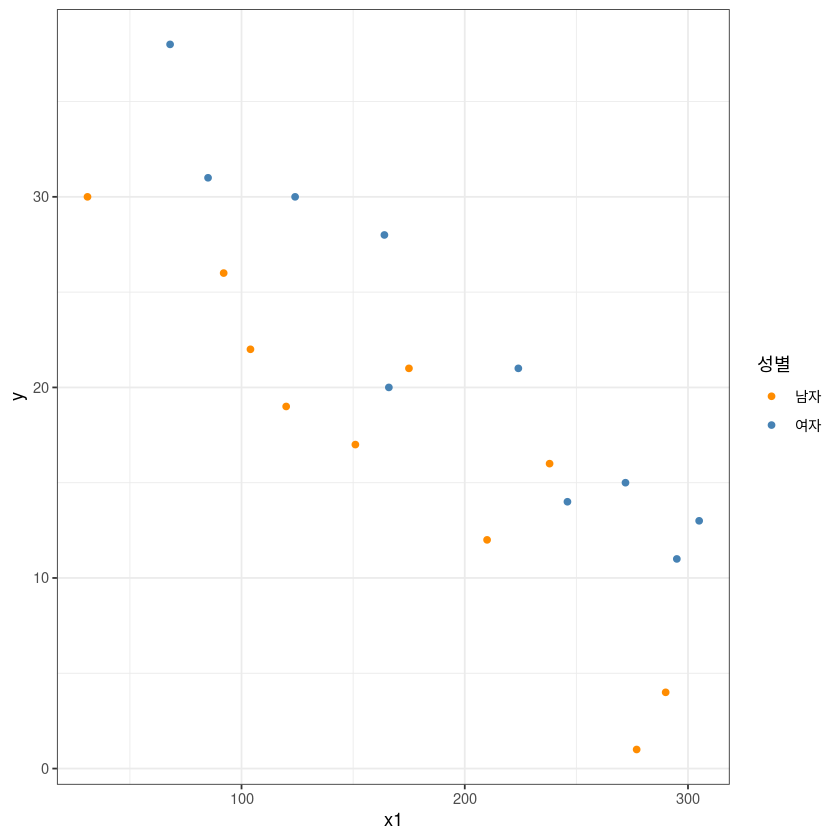

In [7]:
ggplot(dt, aes(x1, y, col=x2)) + 
  geom_point() + 
  theme_bw() +
  guides(col=guide_legend(title="성별")) +
  scale_color_manual(labels = c("남자", "여자"), 
                     values = c("darkorange", "steelblue"))

In [8]:
m <- lm(y~x1+x2, dt)

In [9]:
summary(m)


Call:
lm(formula = y ~ x1 + x2, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0165 -1.7450 -0.6055  1.8803  6.1835 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.834912   1.758659  19.239 5.64e-13 ***
x1          -0.100918   0.008621 -11.707 1.47e-09 ***
x21          7.933953   1.414702   5.608 3.13e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.123 on 17 degrees of freedom
Multiple R-squared:  0.8991,    Adjusted R-squared:  0.8872 
F-statistic: 75.72 on 2 and 17 DF,  p-value: 3.42e-09

$\beta_2$가 유의함을 확인함(3.13e-05) - 남성과 여성이 차이가 있다.

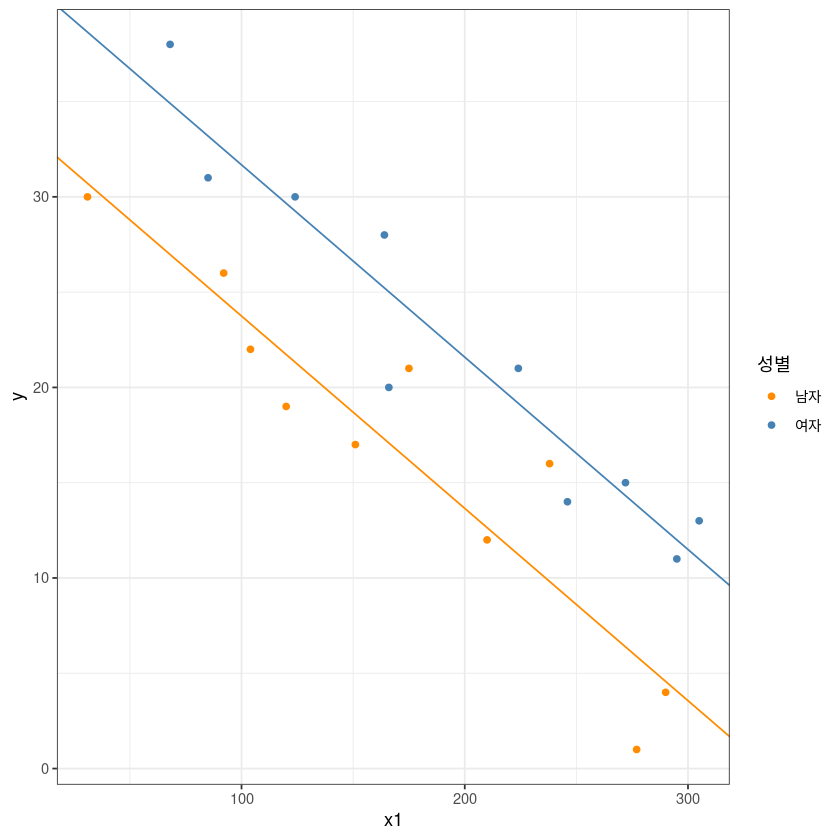

In [10]:
ggplot(dt, aes(x1, y, col=x2)) + 
  geom_point() + 
  theme_bw() + 
  geom_abline(slope = coef(m)[2], intercept = coef(m)[1], col= 'darkorange')+
  geom_abline(slope = coef(m)[2], intercept = coef(m)[1]+coef(m)[3], col= 'steelblue')+
  guides(col=guide_legend(title="성별")) +
  scale_color_manual(labels = c("남자", "여자"), values = c("darkorange", "steelblue"))

기울기 차이 고려 안해서 기울기는 같을 것

### 교호작용

In [11]:
m1 <- lm(y~x1*x2, dt)

곱하기로 교호작용 표현

In [12]:
summary(m1)


Call:
lm(formula = y ~ x1 * x2, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0463 -1.7591 -0.6232  1.9311  6.1102 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.656104   2.365392  14.229 1.68e-10 ***
x1          -0.099858   0.012650  -7.894 6.59e-07 ***
x21          8.313516   3.541379   2.348   0.0321 *  
x1:x21      -0.002089   0.017766  -0.118   0.9078    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.218 on 16 degrees of freedom
Multiple R-squared:  0.8992,    Adjusted R-squared:  0.8803 
F-statistic: 47.56 on 3 and 16 DF,  p-value: 3.405e-08

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_1x_2$ - 성별, 성적,
성별\*성적

$M : x_2=0 \to E(y|M) = \beta_0+\beta_1x_1$

$F : x_2=1 \to E(y|F) = \beta_0 + \beta_1x_1 + \beta_2 + \beta_3x_1 = (\beta_0+\beta_2) + (\beta_1+\beta_3)x_1$

-   식으로 봤을 때 절편, 기울기 모두 차이가 난다.
-   절편 차이는 유의하다.
-   기울기 차이는 거의 없다.
-   교호작용은 없는 것으로 확인.

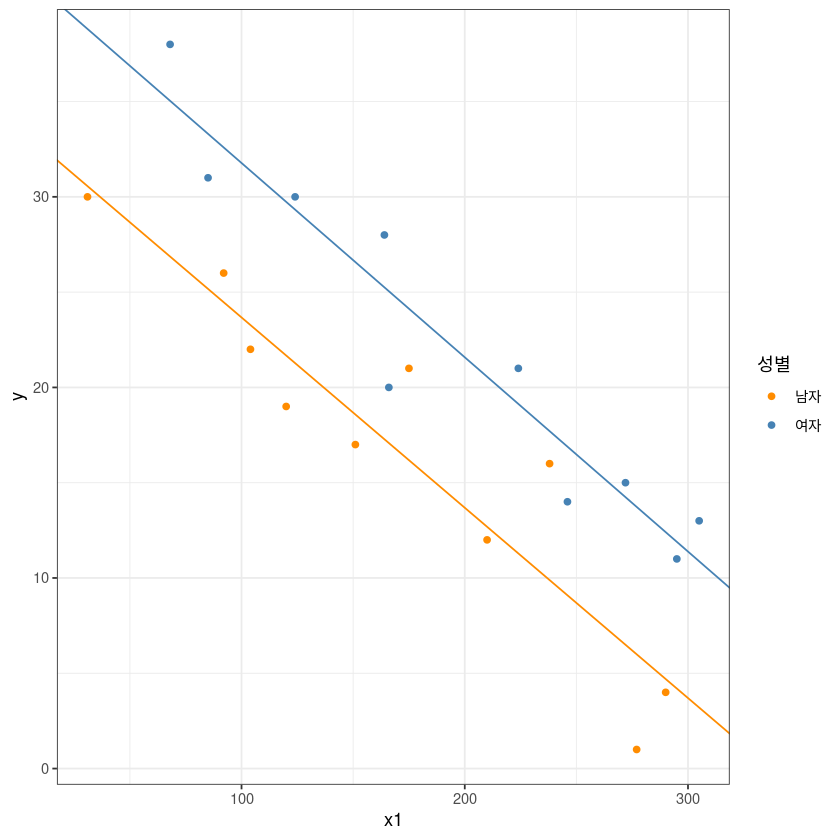

In [38]:
ggplot(dt, aes(x1, y, col=x2)) + 
  geom_point() + 
  theme_bw() + 
  geom_abline(slope = coef(m1)[2], intercept = coef(m1)[1], col= 'darkorange')+
  geom_abline(slope = coef(m1)[2]+coef(m1)[4], intercept = coef(m1)[1]+coef(m1)[3], col= 'steelblue')+
  guides(col=guide_legend(title="성별")) +
  scale_color_manual(labels = c("남자", "여자"), values = c("darkorange", "steelblue"))

### 책 예제

In [39]:
library(ISLR)

In [40]:
head(Carseats)

In [41]:
dim(Carseats)

400 11

• Sales : 판매량 (단위: 1,000)

• Price : 각 지점에서의 카시트 가격

• ShelveLoc : 진열대의 등급 (Bad, Medium, Good)

• Urban :도시 여부 (Yes, No)

• US: 미국 여부 (Yes, No)

$\to$ 세 개의 범주형 자료, 가변수 4개(3-2,2-1,2-1)

In [42]:
fit <- lm(fit<-lm(Sales~Price+ShelveLoc+US, 
                  data=Carseats))

In [43]:
summary(fit)


Call:
lm(formula = fit <- lm(Sales ~ Price + ShelveLoc + US, data = Carseats))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1720 -1.2587 -0.0056  1.2815  4.7462 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     11.476347   0.498083  23.041  < 2e-16 ***
Price           -0.057825   0.003938 -14.683  < 2e-16 ***
ShelveLocGood    4.827167   0.277294  17.408  < 2e-16 ***
ShelveLocMedium  1.893360   0.227486   8.323 1.42e-15 ***
USYes            1.013071   0.195034   5.194 3.30e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.857 on 395 degrees of freedom
Multiple R-squared:  0.5718,    Adjusted R-squared:  0.5675 
F-statistic: 131.9 on 4 and 395 DF,  p-value: < 2.2e-16

In [44]:
contrasts(Carseats$ShelveLoc)

알파벳 순으로 부여된 것 확인

$y= \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \beta_4x_4 + \beta_5x_5$

In [45]:
library(car)

$H_0 : \beta_2 = \beta_3 = 0$

$\beta_2 = 0, \beta_3 = 0$

In [48]:
C<-rbind(c(0,0,1,0,0,0),
         c(0,0,0,1,0,0))

In [49]:
linearHypothesis(fit, C)

유의미한 결과 확인

### 구간별 회귀분석

In [50]:
dt <- data.frame(
  y = c(377,249,355,475,139,452,440,257),
  x1 = c(480,720,570,300,800,400,340,650)
)

In [51]:
dt$x2 = sapply(dt$x1, function(x) max(0, x-500))

In [52]:
m <- lm(y ~ x1+x2, dt)

In [53]:
summary(m)


Call:
lm(formula = y ~ x1 + x2, data = dt)

Residuals:
      1       2       3       4       5       6       7       8 
-22.765  29.765  18.068   4.068 -17.463  20.605 -15.117 -17.160 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 589.5447    60.4213   9.757 0.000192 ***
x1           -0.3954     0.1492  -2.650 0.045432 *  
x2           -0.3893     0.2310  -1.685 0.152774    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.49 on 5 degrees of freedom
Multiple R-squared:  0.9693,    Adjusted R-squared:  0.9571 
F-statistic: 79.06 on 2 and 5 DF,  p-value: 0.0001645

In [54]:
dt2 <- rbind(dt[,2:3], c(500,0))

In [55]:
dt2$y <- predict(m, newdata = dt2)

**this is the predicted line of multiple linear regression**

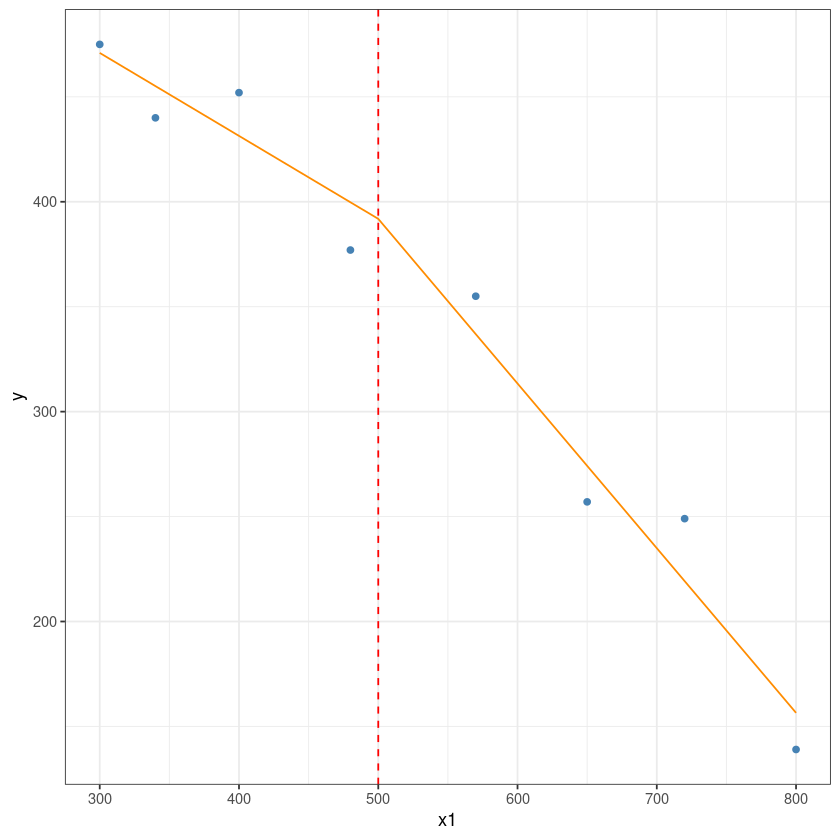

In [56]:
ggplot(data = dt, aes(x = x1, y = y)) + 
  geom_point(color='steelblue') +
  geom_line(color='darkorange',data = dt2, aes(x=x1, y=y))+
  geom_vline(xintercept = 500, lty=2, col='red')+
  theme_bw()